In [1]:
import torch
from torchsummary import summary
import random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [3]:
MyNet = nn.Sequential(
    nn.Linear(1, 150),
    nn.ReLU(),
    nn.Linear(150, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
summary(MyNet, input_size=(32, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 32, 150]             300
              ReLU-2              [-1, 32, 150]               0
            Linear-3               [-1, 32, 50]           7,550
              ReLU-4               [-1, 32, 50]               0
            Linear-5                [-1, 32, 1]              51
Total params: 7,901
Trainable params: 7,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.03
Estimated Total Size (MB): 0.13
----------------------------------------------------------------


In [4]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

In [5]:
def train_and_test (MyNet, lstX, lstY):
  numpyX = np.array(lstX)
  numpyY = np.array(lstY)
  trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
  print("No. of training and testing data:", trainX.shape, trainY_hat.shape, testX.shape, testY_hat.shape)

  fig=plt.figure(figsize=(12, 6))
  fig.add_subplot(2, 2, 1) 
  plt.scatter(trainX, trainY_hat, color = "red")
  plt.scatter(testX, testY_hat, color = "green")

  # initialize NN weights
  for name, param in MyNet.named_parameters():
    if(param.requires_grad):
      torch.nn.init.normal_(param, mean=0.0, std=0.02)

  tensorX = torch.FloatTensor(trainX).to(device)
  tensorY_hat = torch.FloatTensor(trainY_hat).to(device)
  lossLst = []
  for epoch in range(1, 5000):
      tensorY = MyNet(tensorX)
      loss = loss_func(tensorY_hat, tensorY)
      loss1 = float(loss)
      lossLst.append(float(loss))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  fig.add_subplot(2, 2, 2) 
  plt.plot(lossLst)
  plt.grid()

  ## take a look at training data performance
  tensorY = MyNet(tensorX)
  loss = loss_func(tensorY, tensorY_hat)
  print("Training loss: %.2f" % (float(loss)))
  fig.add_subplot(2, 2, 3) 
  trainY = tensorY.detach().cpu().numpy()
  plt.scatter(trainX, trainY, s=50, lw=0, color="blue")
  plt.scatter(trainX, trainY_hat, s=50, lw=0, color="red")
  plt.show()

# Learn from 40 data
### (R,G,B)=(training,test,model predicted value) 

No. of training and testing data: (32, 1) (32, 1) (8, 1) (8, 1)
Training loss: 3800626569084747644928.00


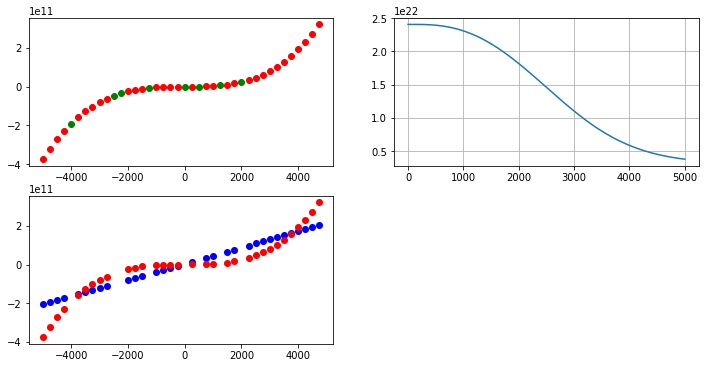

In [6]:
lstX = []
lstY = []
for x in range(-5000, 5000, 250):
  lstX.append([x])
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0, 1)*500
  lstY.append([y])
train_and_test (MyNet, lstX, lstY)

### Normalize x

No. of training and testing data: (32, 1) (32, 1) (8, 1) (8, 1)
Training loss: 24053045566242086191104.00


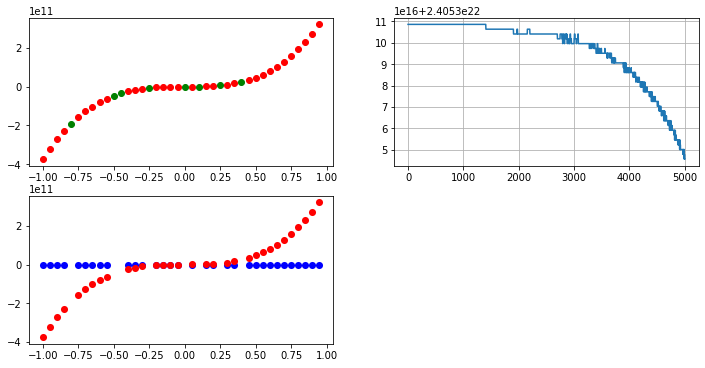

In [7]:
lstX1 = []
lstY = []
for x in range(-5000, 5000, 250):
  lstX1.append(x)
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0,1)*5000
  lstY.append([y])

#normalize x to [-1, 1]
lstX = []
for x in lstX1:
  x = x/5000.0
  lstX.append([x])

train_and_test (MyNet, lstX, lstY)

### Normalize x and y

No. of training and testing data: (32, 1) (32, 1) (8, 1) (8, 1)
Training loss: 0.00


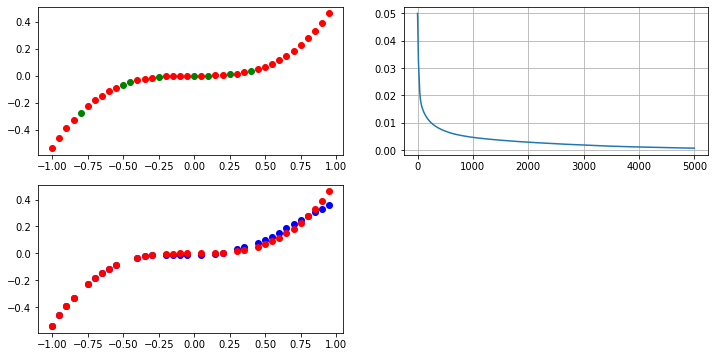

In [8]:
lstX1 = []
lstY1 = []
for x in range(-5000, 5000, 250):
  lstX1.append(x)
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0,1)*5000
  lstY1.append(y)

#normalize x to [-1, 1]
lstX = []
for x in lstX1:
  x = x/5000.0
  lstX.append([x])

#normalize y to [-1, 1]
maxY = max(lstY1)
minY = min(lstY1)
r = maxY - minY
lstY = []
for y in lstY1:
  y = y/r  #normalized to [-1, 1]
  lstY.append([y])
  
train_and_test (MyNet, lstX, lstY)

# Learn from more data

No. of training and testing data: (1600, 1) (1600, 1) (400, 1) (400, 1)
Training loss: 3156324717894521847808.00


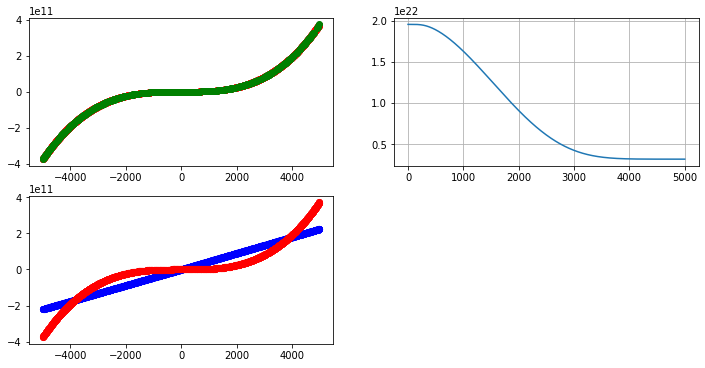

In [9]:
lstX = []
lstY = []
for x in range(-5000, 5000, 5):
  lstX.append([x])
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0, 1)*500
  lstY.append([y])
  
train_and_test (MyNet, lstX, lstY)

### Normalize x

No. of training and testing data: (1600, 1) (1600, 1) (400, 1) (400, 1)
Training loss: 19542843661817865043968.00


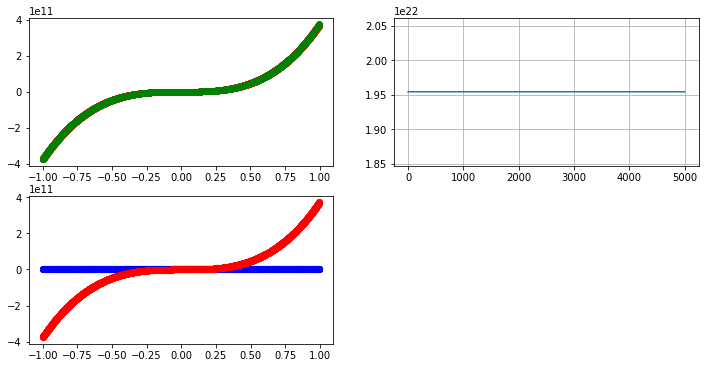

In [10]:
lstX1 = []
lstY = []
for x in range(-5000, 5000, 5):
  lstX1.append(x)
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0,1)*5000
  lstY.append([y])

#normalize x to [-1, 1]
lstX = []
for x in lstX1:
  x = x/5000.0
  lstX.append([x])
  
train_and_test (MyNet, lstX, lstY)

### Normalize x and y

No. of training and testing data: (1600, 1) (1600, 1) (400, 1) (400, 1)
Training loss: 0.01


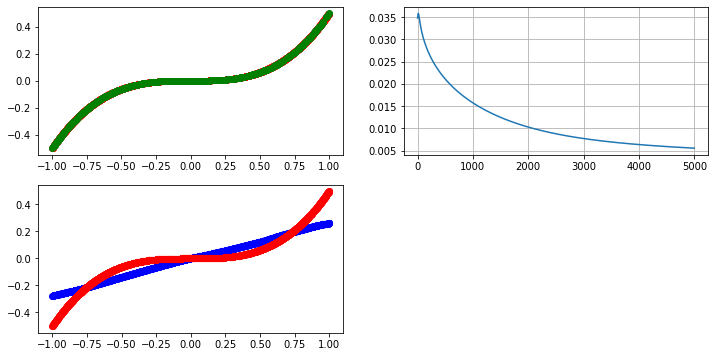

In [11]:
lstX1 = []
lstY1 = []
for x in range(-5000, 5000, 5):
  lstX1.append(x)
  y = 3*x*x*x + 2*x*x + 5*x + random.uniform(0,1)*5000
  lstY1.append(y)

#normalize x to [-1, 1]
lstX = []
for x in lstX1:
  x = x/5000.0
  lstX.append([x])

#normalize y to [-1, 1]
maxY = max(lstY1)
minY = min(lstY1)
r = maxY - minY
lstY = []
for y in lstY1:
  y = y/r  #normalized to [-1, 1]
  lstY.append([y])
  
train_and_test (MyNet, lstX, lstY)

# Practice - try 3 layes

In [12]:
MyNet = nn.Sequential(
    nn.Linear(1, 50),
    nn.ReLU(),
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
summary(MyNet, input_size=(32, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 50]             100
              ReLU-2               [-1, 32, 50]               0
            Linear-3              [-1, 32, 100]           5,100
              ReLU-4              [-1, 32, 100]               0
            Linear-5               [-1, 32, 50]           5,050
              ReLU-6               [-1, 32, 50]               0
            Linear-7                [-1, 32, 1]              51
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.04
Estimated Total Size (MB): 0.14
----------------------------------------------------------------
